In [1]:
!pip install nltk textblob
!python -m textblob.download_corpora
!python -m nltk.downloader vader_lexicon

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.
/usr/lib/python3.10/runpy.py:126: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [2]:
import nltk
from textblob import TextBlob
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
import matplotlib.pyplot as plt


In [3]:
nltk.download('punkt')
nltk.download('stopwords')

def advanced_sentiment_analysis(text):
    # Использование VADER для анализа сентимента
    sia = SentimentIntensityAnalyzer()
    sentiment_scores = sia.polarity_scores(text)

    # Анализ с помощью TextBlob
    blob = TextBlob(text)
    tb_polarity, tb_subjectivity = blob.sentiment

    return sentiment_scores, tb_polarity, tb_subjectivity

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [4]:
def extract_keywords(text):
    words = word_tokenize(text)
    words = [word.lower() for word in words if word.isalpha()]  # Убираем пунктуацию
    stop_words = set(stopwords.words('english'))
    keywords = [word for word in words if not word in stop_words]  # Убираем стоп-слова
    return keywords


In [5]:
def plot_word_frequency(words):
    fdist = FreqDist(words)
    fdist.plot(30, cumulative=False)
    plt.show()

In [15]:
# Пример текста
text = "Im very bad "


In [16]:
# Расширенный анализ сентимента
sentiment_scores, tb_polarity, tb_subjectivity = advanced_sentiment_analysis(text)
print(f"VADER Sentiment Scores: {sentiment_scores}")
print(f"TextBlob Polarity: {tb_polarity}, Subjectivity: {tb_subjectivity}")


VADER Sentiment Scores: {'neg': 0.655, 'neu': 0.345, 'pos': 0.0, 'compound': -0.5849}
TextBlob Polarity: -0.9099999999999998, Subjectivity: 0.8666666666666667


Keywords: ['im', 'bad']


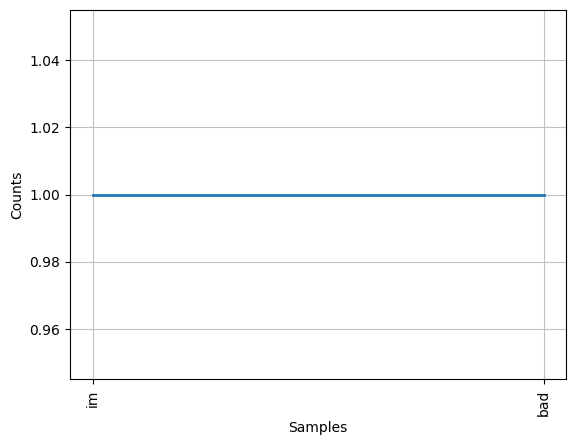

In [17]:
# Извлечение ключевых слов и анализ частотности
keywords = extract_keywords(text)
print(f"Keywords: {keywords}")
plot_word_frequency(keywords)